## 1.3.2 Arithmetic Operations on Images

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [33]:
x = np.uint8([250])

In [34]:
y = np.uint8([10])

In [35]:
print(x)

[250]


In [36]:
print(y)

[10]


In [37]:
x+y

array([4], dtype=uint8)

In [38]:
#250+10=260 0,1,2,...,255,0,1,2,3,4,5

In [39]:
#0 black 255 white

In [40]:
cv2.add(x,y)

array([[255]], dtype=uint8)

In [41]:
img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [42]:
def nothing(x):
    pass

cv2.namedWindow('image')
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img_con03030100_01.jpg')

cv2.createTrackbar('Weight','image',0,255,nothing)


while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    weight = cv2.getTrackbarPos('Weight','image')
    a = weight / 255
    b = 1 - a
    dst = cv2.addWeighted(img1, a, img2, b, 0)
    cv2.imshow('image',dst)
    
    
cv2.destroyAllWindows()


In [60]:
# Load two images
img1 = cv2.imread('maxresdefault.jpg')
img2 = cv2.imread('KakaoTalk_20210923_131053275.png')
def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
print(rows,cols,channels)

580 822 3


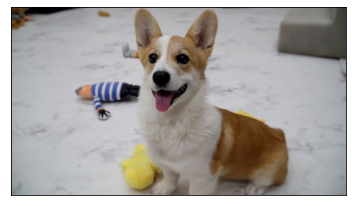

In [61]:
pltImage(img1)

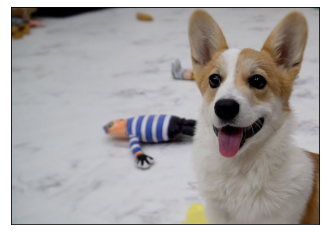

In [62]:
pltImage(roi)

In [63]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

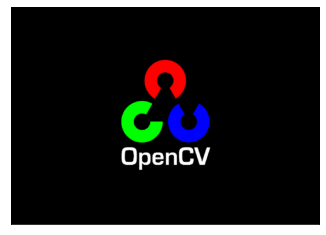

In [64]:
pltImage(img2)

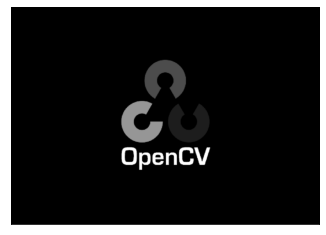

In [65]:
pltImage(img2gray)

In [66]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

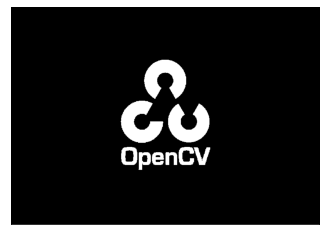

In [67]:
pltImage(mask)

In [68]:
mask_inv = cv2.bitwise_not(mask)

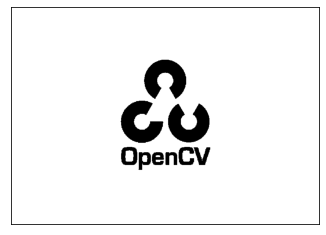

In [69]:
pltImage(mask_inv)

In [70]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

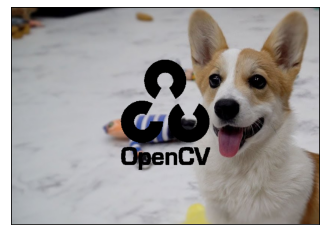

In [71]:
pltImage(img1_bg)

In [72]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

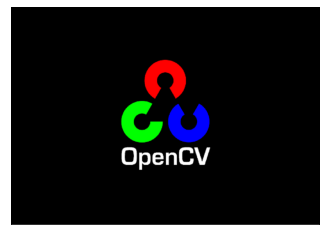

In [73]:
pltImage(img2_fg)

In [74]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)

In [75]:
img1[0:rows, 0:cols ] = dst

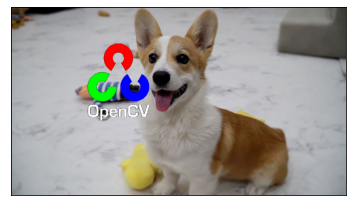

In [76]:
pltImage(img1)

In [77]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()